## Assignment 3

In this assignment, we will solve problem for line fitting and extraction for robot
localisation.

### GROUPNUMBER : 
17
### STUDENT NAMES : 
Henk, Lodewijk, Nils
### STUDENT NUMBERS :
11676892 , 11054115, 11784415

In [1]:
import numpy as np
from numpy.random import normal
import time
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import math
from util import *

## introduction 
For a lot of application in robotics, knowledge of the position and orientation of the 
platform is essential. This exercise could be motivated by an autonomous vehicle 
hauling goods across the corridors of a warehouse. In order to navigate from one place 
to another, the vehicle would need to know its position in the warehouse as well as its 
heading. On its way, it might come across walls, doorways, and racks, all of which would 
be perceived as measurements located along lines by a laser scanner mounted in a way 
that its scanning plane is parallel to the ground. 


## Exercise 1 Line representations

A range scan describes a 2D slice of the environment. Points in a range scan are specified in a polar coordinate system with the origin at the location of the sensor. It is common in literature to assume that the noise on measurements follows a Gaussian distribution with zero mean, some range variance and negligible angular uncertainty. 
We choose to express a line in polar parameters $(\rho, \alpha)$ as defined by the line equation for the Cartesian coordinates $( x, y )$ of the points lying on the line 
$x\cos(\alpha)\ + y\sin(\alpha)\ = \rho$, 
where $—\pi < \alpha < \pi$ is the angle between the x-axis and the shortest connection between the origin and the line. This connection's length is $\rho > 0$.


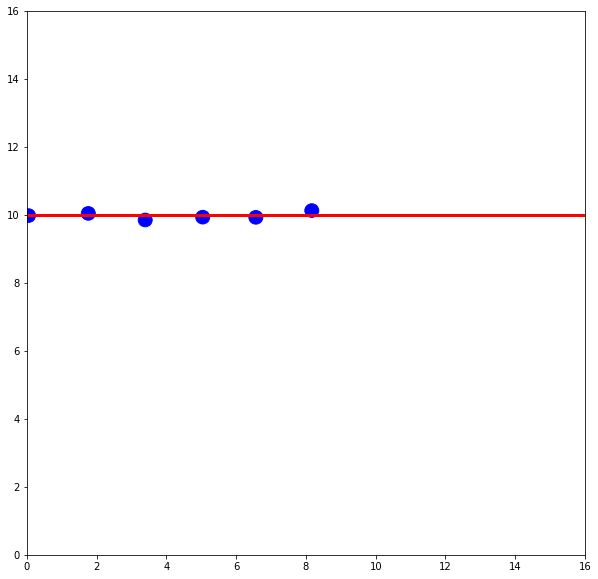

In [2]:
x_points, y_points = get_coords(1)
rho, alpha = get_line(1)

visualize(x_points, y_points, [(rho, alpha)])

### Theory question 1

What are problems with using the classical ax + b = y notation for lines. Tip think about hough spaces.

### Answer
Vertical lines cannot be represented because the gradient a is infinite here.

## Exercise 1: fitline
The first step in creating the Split-and-Merge algorithm is to calculate the best fitting lines for the given points. In this exercise you will finish the fitLine algorithm using a set of points in Cartesian coordinates after reading the following theory. 
The aim of the function is to minimize the sum of squared errors:<br><br>
$$
S(r, \alpha):=\sum_{i}(\underbrace{r-x^{i} \cos \alpha-y^{i} \sin \alpha}_{=\left(D(\alpha, r),\left(x^{i}, y^{i}\right)\right)})^{2}
$$
where $\left(x^{i}, y^{i}\right)$ are the input points in Cartesian coordinates. The solution of $(r, \alpha)$ can be found by imposing: $\nabla S=0 .$ <br>

The solution for $\alpha$ is then
$$
\begin{array}{c}
{\alpha=\frac{\tan ^{-1}\left(\frac{n u m}{d e n o m}\right)}{2}} \\\\
{n u m:=-2 \sum_{i}\left(x^{i}-x_{c}\right)\left(y^{i}-y_{c}\right)} \\\\
{\text { denom }:=\sum_{i}\left(y^{i}-y_{c}\right)^{2}-\left(x^{i}-x_{c}\right)^{2}}
\end{array}
$$<br>
where $\left(x_{c}, y_{c}\right)$ are the Cartesian coordinate of the $\left(x^{i}, y^{i}\right)$ 's centroid. In order to solve for r consider the equation (1) and a point that will surely lie on the line (which one is it?). Please find additional information on $[\text { pp. } 244]$ including a solution for polar input on $[\mathrm{p} .246] .$ 

In [3]:
def fitLine(x_points, y_points):
    """
    This function fits a polar line using the mse fit.=
    input:
        - x_points : np_array
        - y_points : np_array
    output:
        - (alpha, rho) : tupple
            - alpha : float
            - rho : float
        """
    xc = np.mean(x_points)
    yc = np.mean(y_points)

    num = - 2 * (np.sum((x_points - xc) * (y_points - yc)))
    denom = np.sum(((y_points - yc) ** 2) - (x_points - xc) ** 2)
    alpha = (np.arctan2(num, denom)) / 2

    if alpha < 0:
        alpha += np.pi

        
    # Get rho by converting centroid to polar coordinates and
    theta = np.arctan2(yc, xc) - alpha
    rho = np.sqrt(xc**2 + yc**2) * math.cos(theta)
    return rho, alpha


The cell below is a method for validating your implementation

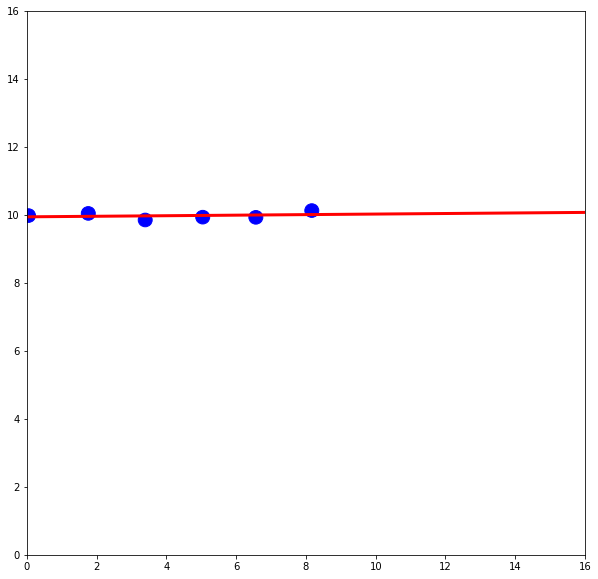

In [4]:
x_points, y_points = get_coords(1)
rho, alpha = fitLine(x_points, y_points)

visualize(x_points, y_points, [(rho, alpha)])

Function get_single_line returns points from a random generated line. Try your implementation a few times to see if it is consistent with different situations. An epsilon can be given to the function to change the amount of noise on the data points.

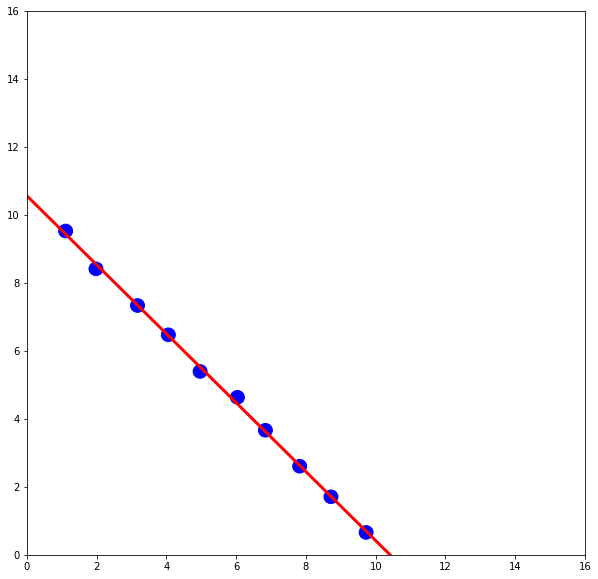

In [5]:
x_points, y_points = get_single_line()
rho, alpha = fitLine(x_points, y_points)

visualize(x_points, y_points, [(rho, alpha)])

## Exercise 2 Split and merge
We employ the popular “Split-and-Merge” \[1, p.249-250\] line extraction algorithm to
divide the obtained range measurements (points) into segments of points lying roughly
on a common line. [https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=905371]

While the just implemented fitLine is generally a good algorithm to fit lines it can sometimes cause problems when it is used in combination with split and merge. A better line fit algorithm is called "iterative-end-point-fit". This is small modification on the normal fitLine that fits the line based on only the first and last point of the given points. You don't have to implement this yourself since it is already given below. 

In [6]:
def iterative_end_point_fit(x_points, y_points):
    """
    This function fits a polar line using iterative-end-point-fit
    input:
        - x_points : np_array
        - y_points : np_array
    output:
        - (alpha, rho) : tupple
            - alpha : float
            - rho : float
    """
    x = np.array([x_points[0], x_points[-1]])
    y = np.array([y_points[0], y_points[-1]])
    
    return fitLine(x, y)

### Exercise 2.1: get furthest point from the line

The first step is to calculate the furthest point from a line. Implement the function get_furthest_point which takes a line and points and returns the argument of the furthest point. Below is a example shown

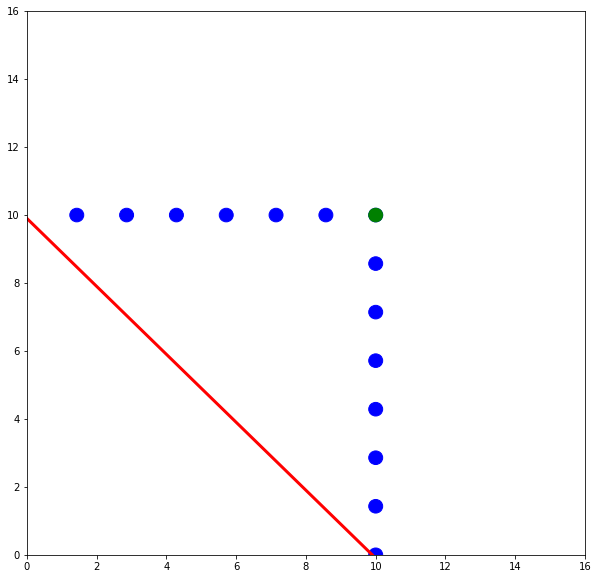

In [7]:
x_points, y_points = get_coords(2)

rho, alpha = get_line(2)
arg_D = get_arg()

visualize_furthest(x_points, y_points, x_points[arg_D], y_points[arg_D], (rho, alpha))

Now implement get_furthest_point yourself

In [8]:
def get_furthest_point(line, x_points, y_points):
    """
        This function will return the distance of the point that is the furthest from the line
        input:
            - line : tupple (alpha, rho)
            - x_points : np_array
            - y_points : np_array
        return:
            - arg_D : the argument of the furthest point
            - dis : distance of the furthest point
    """
    rho, alpha = line
    norm_vec = np.array([math.cos(alpha) * rho, math.sin(alpha) * rho])
    r_vec =  np.array([-norm_vec[1], norm_vec[0]])
    
    line_p1 = norm_vec
    line_p2 = norm_vec + r_vec / np.linalg.norm(r_vec)

    
    max_d = [0, -1]    
    for i,(x,y) in enumerate(zip(x_points, y_points)):
        p = np.array([x, y])
        d = np.linalg.norm( np.cross(line_p2 - line_p1, line_p1 - p)) / np.linalg.norm(line_p2 - line_p1)
        
        if d > max_d[0]:
            max_d = [d, i]
        
    dis = max_d[0]
    arg_D = max_d[1]

    return arg_D, dis

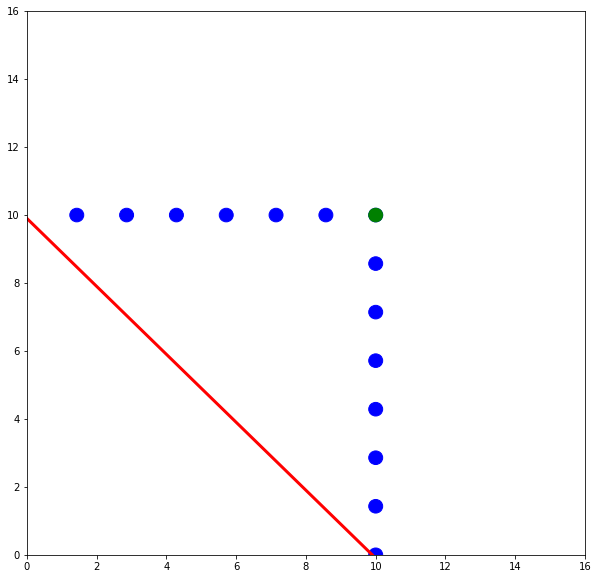

In [9]:
arg_D, dis = get_furthest_point((rho, alpha), x_points, y_points)

visualize_furthest(x_points, y_points, x_points[arg_D], y_points[arg_D], (rho, alpha))

### Exercise 2.2: split the points based on the furthest point

The second step is to split the set of points into two sets of points based on the furthest point. Implement the function get_furthest_point which takes a line and points and returns the argument of the furthest point. Below is a example shown

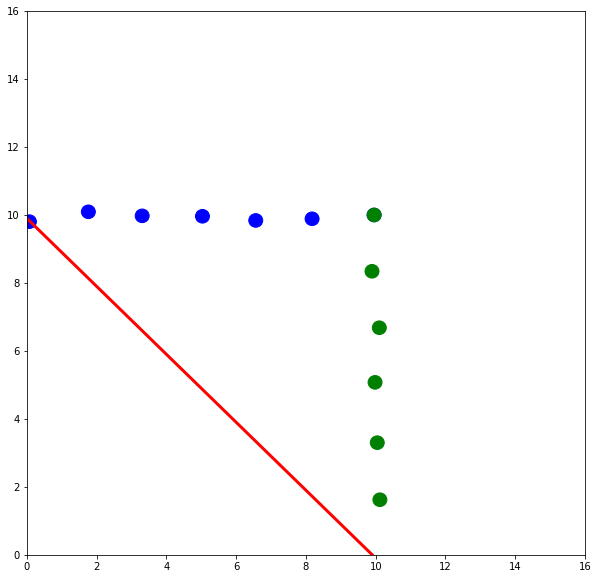

In [10]:
L1_x, L1_y, L2_x, L2_y = get_coords(3) 
rho, alpha = get_line(2)

visualize_split(L1_x, L1_y, L2_x, L2_y, (rho, alpha))

Now implement split_points yourself

In [11]:
def split_points(line, x_points, y_points, arg_D):
    """
        This function will split the x and y points into a group of points that lie below this line and above this line
        input:
            - line : tupple (alpha, rho)
            - x_points : np_array
            - y_points : np_array
            - arg_D : argument of the furthest point
        returns:
            - x_points_1 : np_array
            - y_points_1 : np_array
            - x_points_2 : np_array
            - y_points_2 : np_array
    """
    rho, alpha = line 
    norm_vec = np.array([math.cos(alpha) * rho, math.sin(alpha) * rho])
    r_vec =  np.array([-norm_vec[1], norm_vec[0]])
    
    line_p1 = norm_vec
    line_p2 = norm_vec + r_vec / np.linalg.norm(r_vec)
    
    s = (line_p2[1] - line_p1[1]) / (line_p2[0] - line_p1[0])
    b = line_p2[1] - (s * line_p2[0])
  
    s_i = -s 
    b_i = y_points[arg_D] - (s_i * x_points[arg_D])

    xi = (b - b_i) / (s_i - s)
    yi = s_i * xi + b_i
    
    x_points_1 = []
    y_points_1 = []
    x_points_2 = []
    y_points_2 = []

    for i,(x,y) in enumerate(zip(x_points, y_points)):
     
        b = y_points[i] - (s_i * x_points[i])

        xi = (b - b_i) / (s_i - s)
        yi = s_i * xi + b_i
        
        if xi > 0: 
            x_points_1.append(x_points[i])
            y_points_1.append(y_points[i])
        
        if xi <= 0: 
            x_points_2.append(x_points[i])
            y_points_2.append(y_points[i])
            

    
    return x_points_1, y_points_1, x_points_2, y_points_2


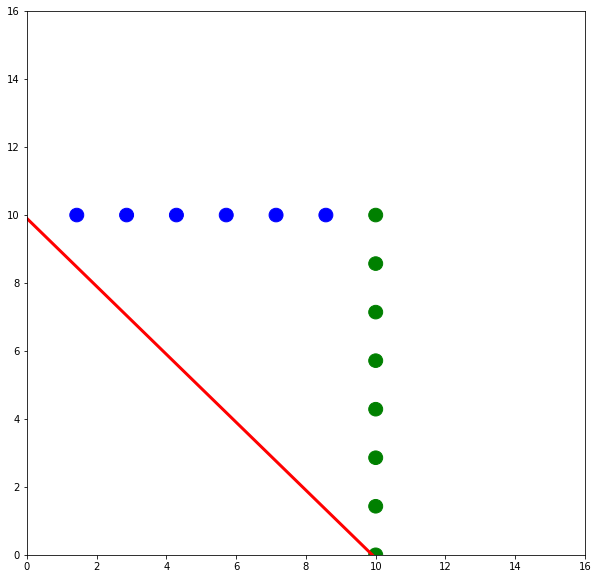

In [12]:
x_points, y_points = get_coords(2)
rho, alpha = get_line(2)
arg_D = get_arg()

L1_x, L1_y, L2_x, L2_y = split_points((rho, alpha), x_points, y_points, arg_D)

visualize_split(L1_x, L1_y, L2_x, L2_y, (rho, alpha))

### Exercise 2.3: Implementing split and merge

Implement the split and merge algorithm using the functions created in Exercise 2.1 and 2.2

An example of a correct results is shown below

[(10, 0), (10, 1.5707963267948966)]


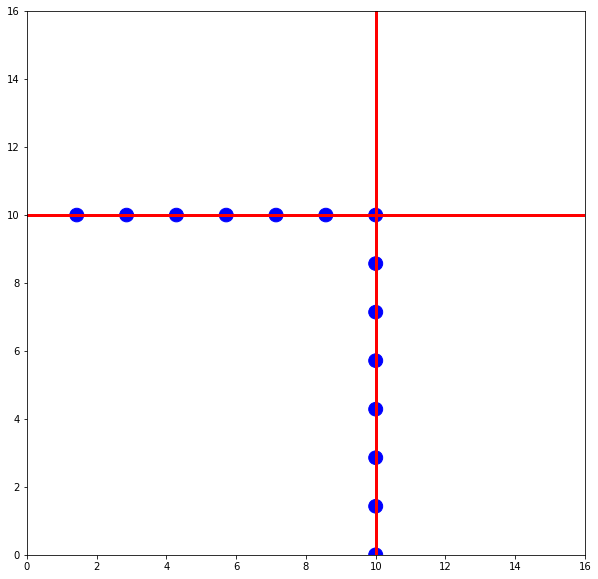

In [13]:
x_points, y_points = get_coords(2)

lines = get_line(3)
print(lines)

visualize(x_points, y_points, lines)

Now implement split and merge yourself

In [14]:
def check(x_points, y_points):
    
    rho, alpha = iterative_end_point_fit(x_points, y_points)
    arg_D, dis = get_furthest_point((rho, alpha), x_points, y_points)
    


def split_and_merge(x_points, y_points, D=0.1):
    """
        This function will split and merge untill the furthest point is smaller than the threshold
        input:
            - x_points : np_array
            - y_points : np_array
        output:
            - lines : list of tupples [(alpha1, rho1), (alpha2, rho2), ...]
    """
    
    rho, alpha = iterative_end_point_fit(x_points, y_points)
    arg_D, dis = get_furthest_point((rho, alpha), x_points, y_points)
    dist = []
    dist.append(dis)

    lines = []

    x_list = [x_points]
    y_list = [y_points]
    
     
    while np.max(dist) > D:
        
        i = np.argmax(dis)
        rho, alpha = iterative_end_point_fit(x_list[i], y_list[i])
        arg_D, dis = get_furthest_point((rho, alpha), x_list[i], y_list[i])

        L1_x, L1_y, L2_x, L2_y = split_points((rho, alpha), x_list[i], y_list[i], arg_D)
        x_list.append(L1_x)
        x_list.append(L2_x)
        
        rho, alpha = iterative_end_point_fit(L1_x, L1_y)
        arg_D, dis = get_furthest_point((rho, alpha), L1_x, L1_y)
        dist.append(dis)
        y_list.append(L1_y)
        y_list.append(L2_y)
        
        rho, alpha = iterative_end_point_fit(L2_x, L2_y)
        arg_D, dis = get_furthest_point((rho, alpha), L2_x, L2_y)
        dist.append(dis)
        dist.pop(i)
        x_list.pop(i)
        y_list.pop(i)
        
    
    for i in range(len(dist)):
        rho, alpha = iterative_end_point_fit(x_list[i], y_list[i])
        lines.append((rho, alpha))
              
    
    return lines

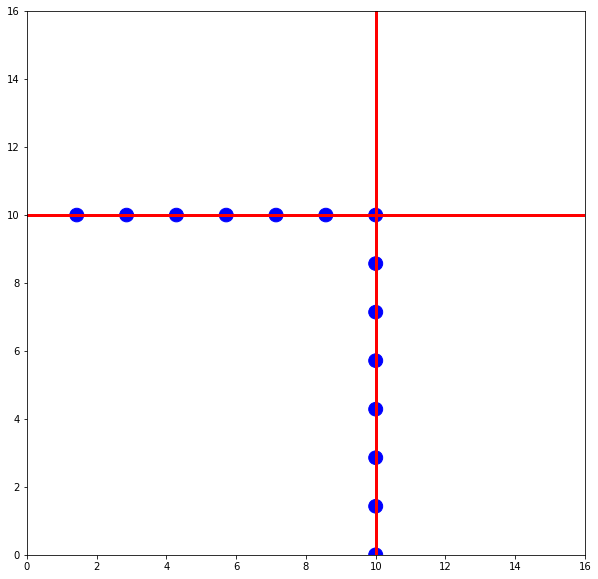

In [15]:
lines = split_and_merge(x_points, y_points, 1)



visualize(x_points, y_points, lines)

Try the algorithm on other situations

Try your implementation off split and merge using the functions get_single_line, get_double_line and get_triple_line to test how consistent it is. All three functions can be given an epsilon to change the amount of noise on the points.

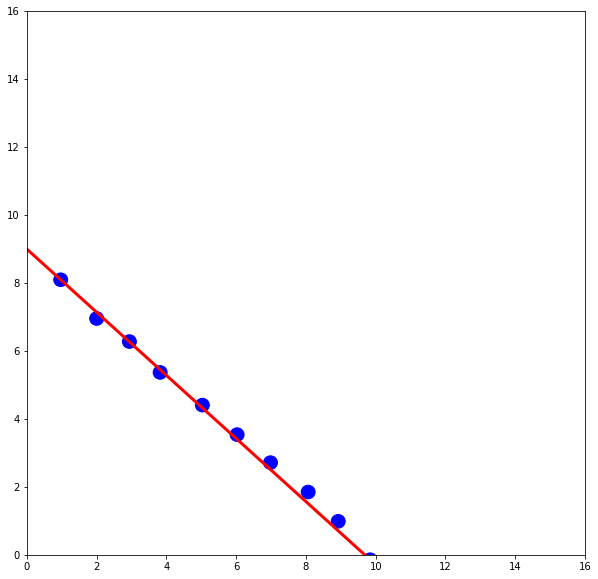

In [16]:
x_points, y_points = get_single_line()
lines = split_and_merge(x_points, y_points, 1)

visualize(x_points, y_points, lines)

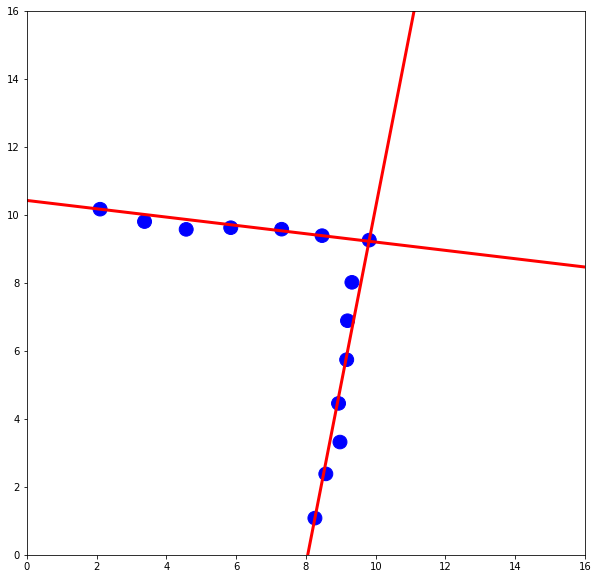

In [17]:
x_points, y_points = get_double_line()
lines = split_and_merge(x_points, y_points, 1)

visualize(x_points, y_points, lines)

[(9.653752963396396, 1.6741986878493995), (10.123491243491925, 1.5983166415297607), (10.899917466388047, 0.6270517595858579), (10.28644310483923, 0.17514879498540917)]


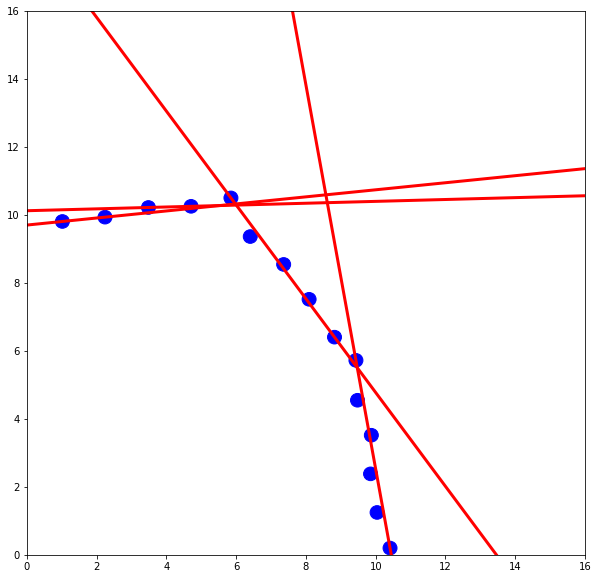

In [18]:
x_points, y_points = get_triple_line()
lines = split_and_merge(x_points, y_points, 1)
print(lines)

visualize(x_points, y_points, lines)

### Theory question 2
In split and merge we set a threshold D, explain the function of this threshold, what happens in its limits: D=0 and D=$\infty$

### Answer

If D = 0 the split_merge algorithm keeps splitting the line into smaller parts until there is only one point per line because the distance beteen point and line will never be zero. This means there is no line anymore. The algoritmh gives an error, because fitline needs more than one point to create a line.

If D = $\infty$ the algorithm will terminate immediately, because the distance from point to line is always smaller than infinity. The returned line is between the two furthest points.

### Theory question 3
In figure below we see some data points with some error. In the book we assume we have error free data. Can you think of a extention to the split-and-merge algorithm that can deal with this kind error in the data?

![title](split_and_merge_error.png)

### Answer

# Handing in
Before you hand in this IPYNB please use restart and run all, after running save the notebook and hand in